In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Load Dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:


# Drop columns that aren't useful
df.drop(['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'], axis=1, inplace=True)

# Drop rows with missing target
df.dropna(subset=['survived'], inplace=True)


In [7]:
print("\nBasic Info:")
print(df.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB
None


In [8]:
print("\nSummary Stats:")
print(df.describe())



Summary Stats:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64


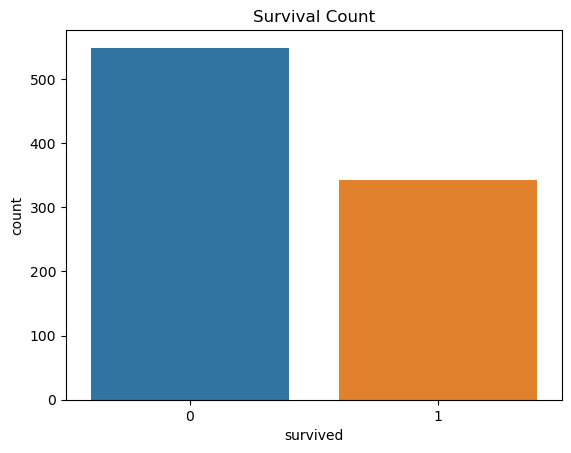

In [10]:
# Survival Count Plot
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()


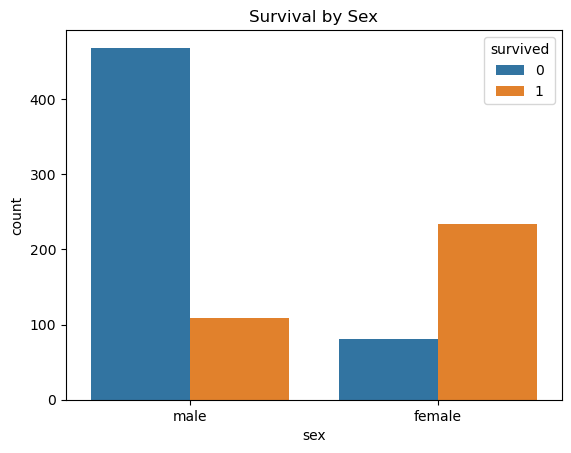

In [11]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Sex")
plt.show()

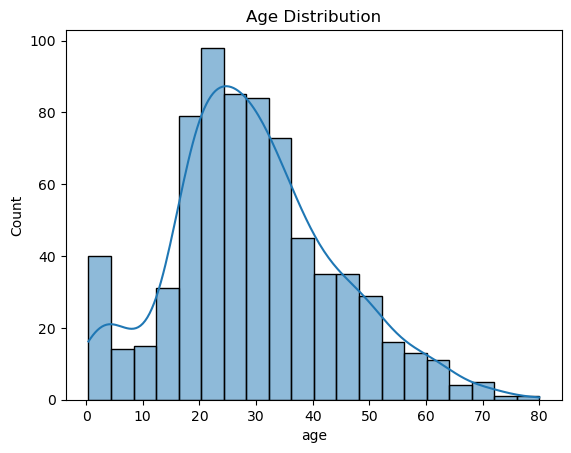

In [12]:
# Age Distribution
sns.histplot(df['age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

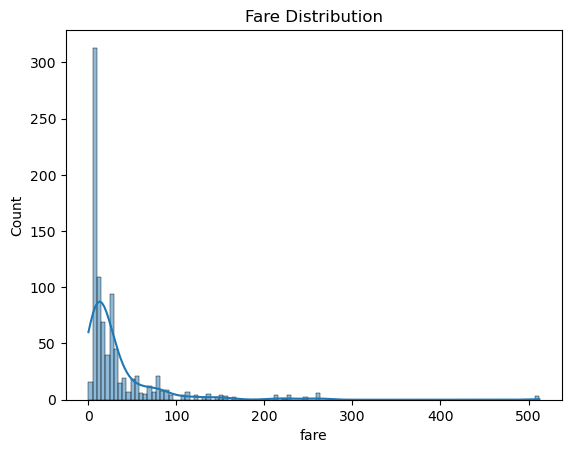

In [13]:
# Fare Distribution
sns.histplot(df['fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

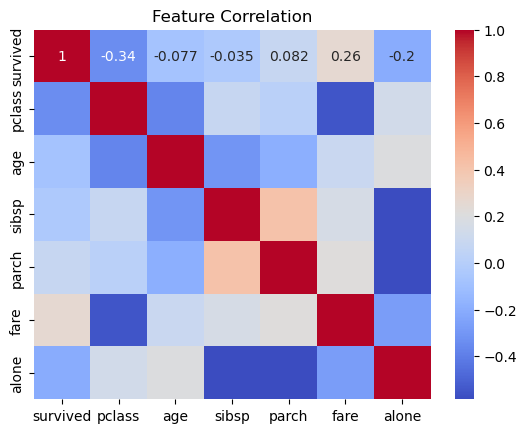

In [14]:
# Heatmap of Correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [15]:

# ------------------------
# Preprocessing
# ------------------------
X = df.drop("survived", axis=1)
y = df["survived"]


In [16]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [17]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [18]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

In [20]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# ------------------------
# Model Training and Evaluation
# ------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}


Logistic Regression Confusion Matrix:


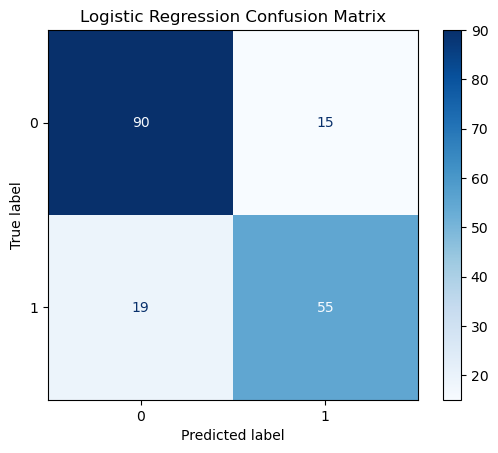


Decision Tree Confusion Matrix:


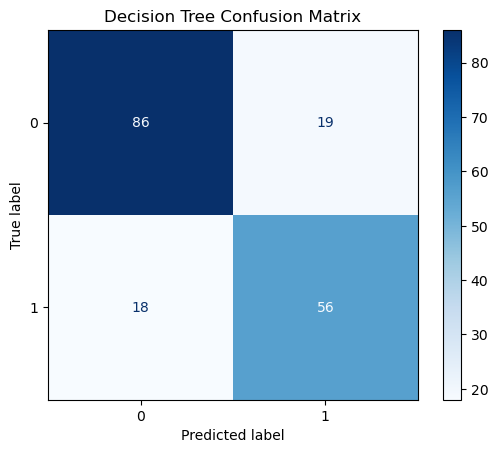


Random Forest Confusion Matrix:


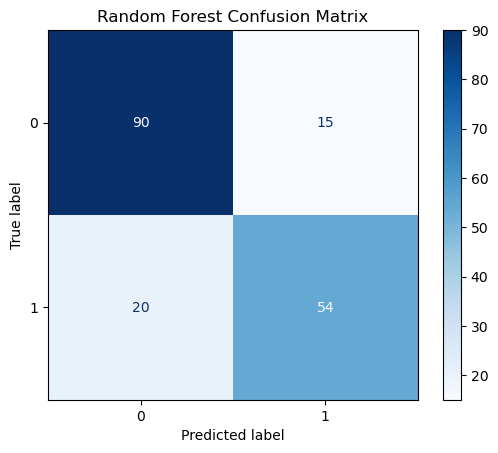


SVM Confusion Matrix:


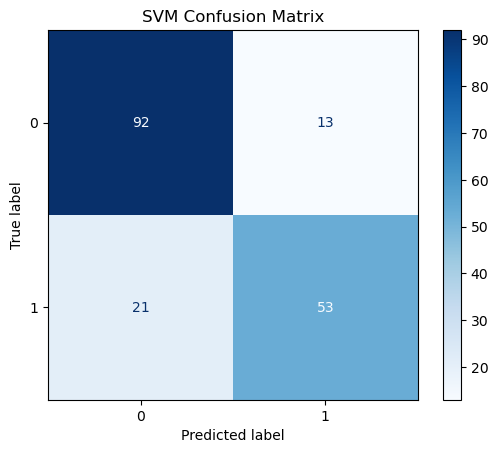


KNN Confusion Matrix:


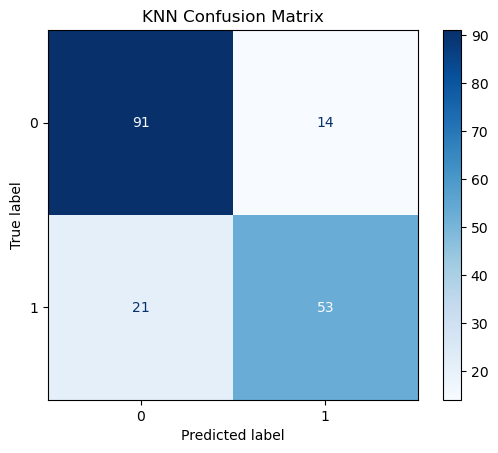

In [23]:
# ------------------------
# Model Training and Evaluation
# ------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })

    print(f"\n{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [24]:

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df.sort_values(by='F1-score', ascending=False))



Model Performance:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.810056   0.785714  0.743243  0.763889
3                  SVM  0.810056   0.803030  0.716216  0.757143
2        Random Forest  0.804469   0.782609  0.729730  0.755245
4                  KNN  0.804469   0.791045  0.716216  0.751773
1        Decision Tree  0.793296   0.746667  0.756757  0.751678


In [25]:
# ------------------------
# Hyperparameter Tuning (GridSearchCV)
# ------------------------
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [4, 6, 8, None]
}


In [26]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [27]:

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("\nBest Random Forest Params:", grid_search.best_params_)



Best Random Forest Params: {'classifier__max_depth': 6, 'classifier__n_estimators': 100}


In [28]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [29]:
print("\nClassification Report for Best Random Forest Model:")
print(classification_report(y_test, y_pred_best))



Classification Report for Best Random Forest Model:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



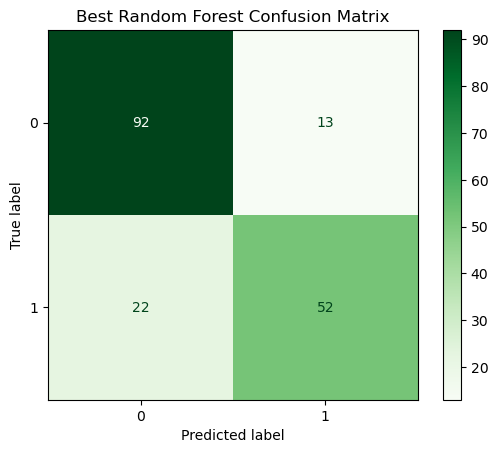

In [30]:

cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Greens')
plt.title("Best Random Forest Confusion Matrix")
plt.show()
